# ANALYSIS OF PRICE MOVEMENTS IN FPT.VN STOCK

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vnstock import stock_historical_data

## Stock price data collection

In [170]:
# Thiết lập định dạng hiển thị cho Pandas
pd.set_option('display.float_format', '{:.2f}'.format) 
pd.set_option('display.max_columns', None)            
pd.set_option('display.width', 1000)             
pd.set_option('display.max_rows', None)          
# Thu thập dữ liệu
df = stock_historical_data(
    symbol='FPT',
    start_date='2023-06-01',
    end_date='2025-06-01',
    resolution='1D'
)
print(df.head())

         time   open   high    low  close   volume ticker
0  2023-06-01  60690  60690  60040  60330   537300    FPT
1  2023-06-02  60330  60900  60040  60540   735900    FPT
2  2023-06-05  60620  61560  60540  61410  1425500    FPT
3  2023-06-06  61630  61630  61210  61630   514000    FPT
4  2023-06-07  61410  61700  60900  61410   705800    FPT


### FPT_raw_data

In [173]:
df.to_csv('FPT_raw_data.csv', index=False, encoding='utf-8-sig')

## Data cleaning and preprocessing

### Convert the 'time' column to datetime format

In [177]:
df['time'] = pd.to_datetime(df['time'])
print(df.head())

        time   open   high    low  close   volume ticker
0 2023-06-01  60690  60690  60040  60330   537300    FPT
1 2023-06-02  60330  60900  60040  60540   735900    FPT
2 2023-06-05  60620  61560  60540  61410  1425500    FPT
3 2023-06-06  61630  61630  61210  61630   514000    FPT
4 2023-06-07  61410  61700  60900  61410   705800    FPT


### Handling Dupticates

In [180]:
df = df.drop_duplicates()
df.head()

,time,open,high,low,close,volume,ticker
0,2023-06-01,60690,60690,60040,60330,537300,FPT
1,2023-06-02,60330,60900,60040,60540,735900,FPT
2,2023-06-05,60620,61560,60540,61410,1425500,FPT
3,2023-06-06,61630,61630,61210,61630,514000,FPT
4,2023-06-07,61410,61700,60900,61410,705800,FPT


### Handling missing values

In [183]:
#check missing values
print(df.isnull().sum())

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


#### No Missing Values in Financial Data

In the field of financial analysis, **missing values** are a significant issue that analysts often face. However, for large companies or stocks that have been listed for a long time on reputable stock exchanges, encountering **missing values** is quite rare. Financial data services such as **Yahoo Finance**, **Alpha Vantage**, and **Quandl** have done an excellent job of handling this issue, especially when using APIs like **yfinance**.

#### Special Cases Where Missing Values May Occur
- **Non-Trading Days:** Weekends or public holidays are days without trading, and therefore, no data is available. However, in such cases, financial data services usually fill the missing values with the previous day's or the next day's value.
  
- **Newly Listed Stocks:** Stocks that are newly listed on the exchange may lack historical data during the early period. However, as the stock becomes actively traded, the data will be updated regularly.

- **System Failures:** Occasionally, technical issues or system failures may result in missing data for a few days, but most financial data services will handle and restore the data.

#### Handling Missing Values by Deletion
In some cases, if the missing values cannot be filled with available data, analysts may choose to delete rows or data points with missing values. This is often done when:

- **The missing values are few** and do not significantly impact the analysis.
- **The missing data is random** and not part of any pattern, ensuring that its removal will not bias the results.
- **There is sufficient data** to conduct an analysis even after deletion, which helps maintain the integrity and accuracy of the results.

In practice, this can be done using methods such as:
```python
# Drop rows with missing values
df = df.dropna()

### Checking and Removing Outliers
Outliers in Financial Data

Outliers are data points that differ significantly from the rest of the data, often lying far from the mean or outside the usual distribution range.

In financial data (e.g., stock prices), outliers can be:

- Sudden and extreme increases/decreases in closing prices.
- Extremely high or low trading volumes compared to normal.
- Data entry errors (e.g., price = 0, or price = 99999).

#### Purpose of Handling Outliers:
- **Improving Data Quality:** Ensuring that models, charts, or statistics are not skewed.
- **Detecting Anomalies:** These could represent investment opportunities or data errors.
- **Smoothing the Data:** Helps stabilize sensitive algorithms (such as averages, regression, machine learning models).

We will use the **Interquartile Range (IQR)** method to detect outliers in the **Close** column.

* We will calculate the quartiles Q1 (25%), Q3 (75%), and the IQR (Interquartile Range) for the **Close** column.
The IQR is calculated as Q3 - Q1.

In [188]:
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1

* According to the IQR theory, outliers will lie outside the range:
  - Below: Q1 - 1.5 × IQR
  - Above: Q3 + 1.5 × IQR


In [191]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['close'] < lower_bound) | (df['close'] > upper_bound)]
print("Outliers are : ")
print(outliers)

Outliers are : 
Empty DataFrame
Columns: [time, open, high, low, close, volume, ticker]
Index: []


After applying the **Interquartile Range (IQR)** method to detect outliers in the **Close** column, we found that there are no outliers in the data.
#### Conclusion:
- The closing prices for the selected period are well within the expected range, and all values are consistent with the overall distribution.
- No data points fall outside the typical range of values based on the IQR calculation.
- Therefore, the data is considered free from outliers and can be used for further analysis or modeling without concerns about extreme anomalies.

---

#### If There Are Outliers:
If the data contains outliers, there are several common methods to handle them:

##### 1. **Removing Outliers**
- One of the simplest ways is to remove data points that fall outside the IQR range (Q1 - 1.5 × IQR and Q3 + 1.5 × IQR).
- This will help eliminate extreme values and improve the accuracy of the model.
- Code Python: filtered_data = data[(data['Close'] >= lower_bound) & (data['Close'] <= upper_bound)]

##### 2. **Replacing Outliers**
- Instead of removing outliers, you can replace them with the mean or median value of the column. This method prevents a significant reduction in the data size.
- **Forward Fill** or **Backward Fill** can also be used to fill missing or abnormal values.
- Code Python:
```python
median_value = data['Close'].median()
data['Close'] = data['Close'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

### **Conclusion: Data Cleaning When There Are No Outliers or Missing Values**

When dealing with financial data that does not contain any outliers or missing values, the data can be considered clean and ready for further analysis. The absence of outliers ensures that extreme or abnormal values do not distort the results, while the lack of missing values guarantees the completeness of the dataset. 

#### Benefits:
1. **Increased Accuracy:** Clean data leads to more accurate models and analysis, as there are no irregularities or gaps in the data.
2. **Reduced Preprocessing Time:** Without the need for data imputation or outlier removal, analysts can focus directly on interpreting the data and building predictive models.
3. **Improved Model Stability:** Data that is consistent and complete helps ensure that machine learning or statistical models perform reliably without being influenced by erroneous data points.

#### Conclusion:
In such cases, the dataset is ready for use in further analyses, such as trend analysis, forecasting, or building machine learning models, without the need for additional data cleaning steps. Clean data enhances the quality and reliability of the insights derived from the analysis.


## Calculating Basic Technical Indicators

### SMA (Simple Moving Average) 

SMA (Simple Moving Average) is a simple moving average calculated by taking the average of the closing prices over a specific period. SMA helps smooth out price data and identify the general trend of the market. It reacts slowly to short-term fluctuations and is suitable for observing medium to long-term trends. In this case, we will calculate the SMA for periods of 20 and 50 days.

In [198]:
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()
df.head()

,time,open,high,low,close,volume,ticker,SMA_20,SMA_50
0,2023-06-01,60690,60690,60040,60330,537300,FPT,NaN,NaN
1,2023-06-02,60330,60900,60040,60540,735900,FPT,NaN,NaN
2,2023-06-05,60620,61560,60540,61410,1425500,FPT,NaN,NaN
3,2023-06-06,61630,61630,61210,61630,514000,FPT,NaN,NaN
4,2023-06-07,61410,61700,60900,61410,705800,FPT,NaN,NaN


### EMA (Exponential Moving Average)

EMA (Exponential Moving Average) is a type of moving average that gives more weight to recent prices by assigning higher weights to the most recent days. 
EMA responds more quickly than SMA to price fluctuations, making it more suitable for detecting buy or sell signals earlier. It is often used in short-term trading strategies.

In [202]:
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
df.head()

,time,open,high,low,close,volume,ticker,SMA_20,SMA_50,EMA_20
0,2023-06-01,60690,60690,60040,60330,537300,FPT,NaN,NaN,60330.00
1,2023-06-02,60330,60900,60040,60540,735900,FPT,NaN,NaN,60350.00
2,2023-06-05,60620,61560,60540,61410,1425500,FPT,NaN,NaN,60450.95
3,2023-06-06,61630,61630,61210,61630,514000,FPT,NaN,NaN,60563.24
4,2023-06-07,61410,61700,60900,61410,705800,FPT,NaN,NaN,60643.89


### RSI (Relative Strength Index)

RSI (Relative Strength Index) is an indicator that measures momentum and the rate of price changes, oscillating between 0 and 100. 
RSI is commonly used to identify overbought (RSI > 70) or oversold (RSI < 30) conditions, helping to predict potential trend reversals. 
This indicator is particularly useful in short-term analysis to identify potential entry and exit points for trades.

In [206]:
dif = df['close'].diff()
increase = dif.where(dif > 0, 0)
decrease = -dif.where(dif < 0, 0)

avg_increase = increase.rolling(window=14).mean()
avg_decrease = decrease.rolling(window=14).mean()

rsi = 100 - (100 / (1 + (avg_increase / avg_decrease)))
df['RSI'] = rsi
df.head()

,time,open,high,low,close,volume,ticker,SMA_20,SMA_50,EMA_20,RSI
0,2023-06-01,60690,60690,60040,60330,537300,FPT,NaN,NaN,60330.00,NaN
1,2023-06-02,60330,60900,60040,60540,735900,FPT,NaN,NaN,60350.00,NaN
2,2023-06-05,60620,61560,60540,61410,1425500,FPT,NaN,NaN,60450.95,NaN
3,2023-06-06,61630,61630,61210,61630,514000,FPT,NaN,NaN,60563.24,NaN
4,2023-06-07,61410,61700,60900,61410,705800,FPT,NaN,NaN,60643.89,NaN


### Handling Missing Data (NaN)

SMAs with insufficient periods have been removed to ensure statistical accuracy.

In [210]:
df.dropna(inplace = True)
df.head()

,time,open,high,low,close,volume,ticker,SMA_20,SMA_50,EMA_20,RSI
49,2023-08-09,70610,71190,69760,69850,982700,FPT,68800.00,64647.60,68729.75,63.32
50,2023-08-10,69850,70020,69090,69090,1343300,FPT,69069.00,64822.80,68764.06,55.59
51,2023-08-11,68920,69760,68500,68920,1142900,FPT,69224.00,64990.40,68778.91,54.57
52,2023-08-14,69000,69930,68920,69440,1014100,FPT,69376.00,65151.00,68841.87,55.81
53,2023-08-15,69440,70860,68500,70610,1675600,FPT,69599.50,65330.60,69010.27,55.81


In [247]:
df.to_csv('FPT_clean_data.csv', index=False, encoding='utf-8-sig')

### *Conclusion*
After completing the calculation of basic technical indicators such as SMA (Simple Moving Average), EMA (Exponential Moving Average), and RSI (Relative Strength Index), additional features have been incorporated into the data to provide a clearer description of the stock's price movement trend during the study period.
Specifically:
- The SMA20 and SMA50 indicators reflect the medium-term and long-term trends of the stock.
- EMA20 provides a quicker perspective on short-term fluctuations.
- RSI indicates the strength/weakness of the price based on momentum, which helps identify overbought/oversold conditions.
The calculation of these indicators is an important step in preparation for the next phase of analysis, where the technical variables will be compared, evaluated, and visualized to make informed investment decisions.

## Data Analysis

### Calculate Daily Returns and Return Distribution

Daily returns reflect the relative change in the closing price compared to the previous day. 
We will calculate logarithmic returns for easier analysis and plot a histogram to observe the distribution of returns.

Formula:

rt = ln(Pt / P(t-1))

Where:

rt : Logarithmic return at time t
Pt : Closing price today
P(t-1) : Closing price the previous day


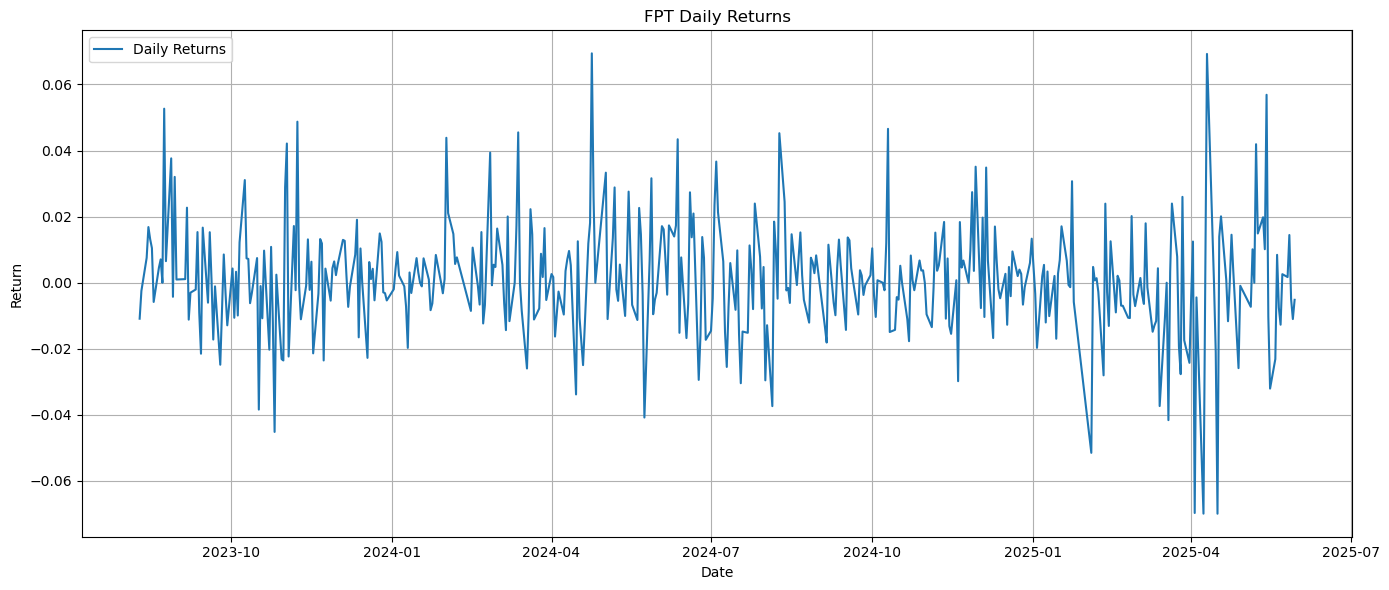

In [216]:
df['Return'] = df['close'].pct_change()
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['Return'], label='Daily Returns', linewidth=1.5)

plt.title('FPT Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Comments and Recommendations:*
* Centered Around Zero: The highest peak is near 0.00, indicating that daily returns are mainly stable or slightly increasing.
* Right Skewness: The frequency of positive returns (0.00 - 0.05) is higher than that of negative returns (-0.20 - -0.05), reflecting a slight upward price trend.
* Low Volatility: The range of returns from -0.20 to 0.05 shows that the stock price experiences little significant fluctuation.
* Outliers: Small frequencies at -0.20 and 0.05 indicate some days with sharp declines or sudden increases.
* High Frequency in the Positive Range: The region between 0.00 and 0.02 has a high frequency (14-16 occurrences), showing many days with slight price increases.
* Stability and Risk: The trend is stable but with the risk of sudden price drops (negative outliers), which requires monitoring specific events.
* **Recommendation:** Suitable for a long-term strategy, but attention should be given to news that may cause volatility.

### Calculate Volatility on a Monthly or Quarterly Basis

In [220]:
#Create Monthly Volatility
df['Month'] = df['time'].dt.to_period('M')
all_months = pd.period_range(start='2023-06', end='2024-12', freq='M')
monthly_volatility = df.groupby('Month')['Return'].std().reindex(all_months, fill_value=np.nan)
print(monthly_volatility)

2023-06    NaN
2023-07    NaN
2023-08   0.02
2023-09   0.01
2023-10   0.02
2023-11   0.02
2023-12   0.01
2024-01   0.01
2024-02   0.02
2024-03   0.02
2024-04   0.02
2024-05   0.02
2024-06   0.02
2024-07   0.02
2024-08   0.02
2024-09   0.01
2024-10   0.01
2024-11   0.02
2024-12   0.01
Freq: M, Name: Return, dtype: float64


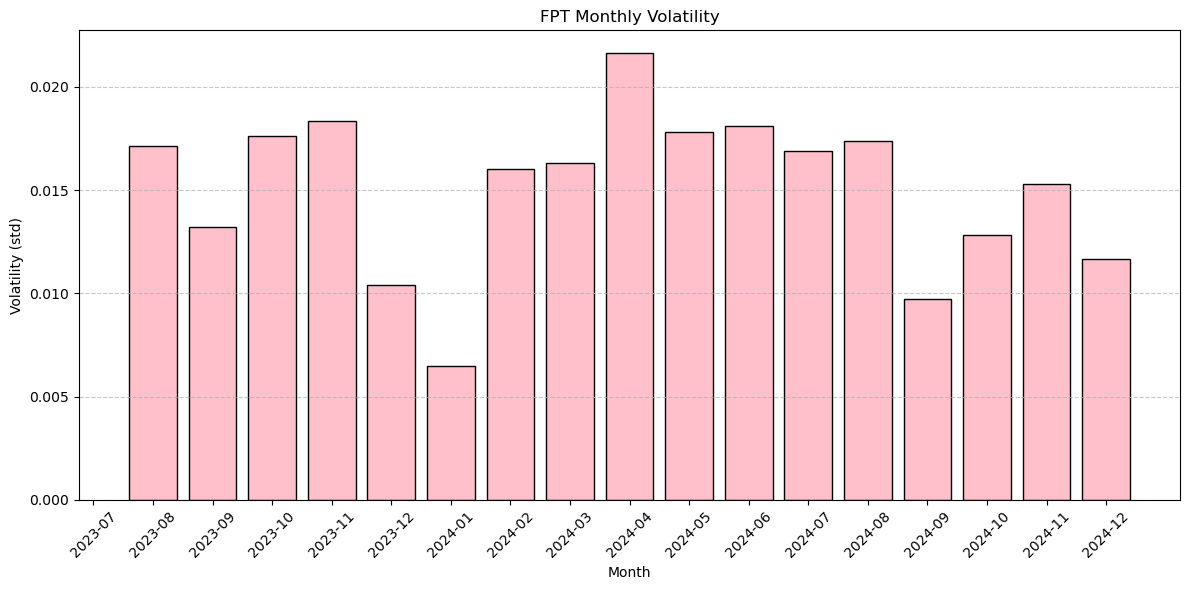

In [222]:
#Visualizing Monthly Volatility (Bar Chart)
plt.figure(figsize=(12, 6))
plt.bar(monthly_volatility.index.astype(str), monthly_volatility, color='pink', edgecolor='black')
plt.title('FPT Monthly Volatility')
plt.xlabel('Month')
plt.ylabel('Volatility (std)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đảm bảo tất cả nhãn trục x được hiển thị
plt.tight_layout()
plt.show()

### Analyzing the Correlation Between Closing Price and SMA, RSI Indicators

We will calculate the correlation coefficient between the closing price and technical indicators such as SMA, EMA, and RSI. This helps to assess the degree of dependence between the indicators and price volatility.

In [226]:
cordata = df[['close', 'SMA_20', 'EMA_20', 'RSI']]
cor_matrix = cordata.corr()
print(cor_matrix)

        close  SMA_20  EMA_20   RSI
close    1.00    0.98    0.99 -0.10
SMA_20   0.98    1.00    1.00 -0.26
EMA_20   0.99    1.00    1.00 -0.24
RSI     -0.10   -0.26   -0.24  1.00


We will use a heatmap for visualization :

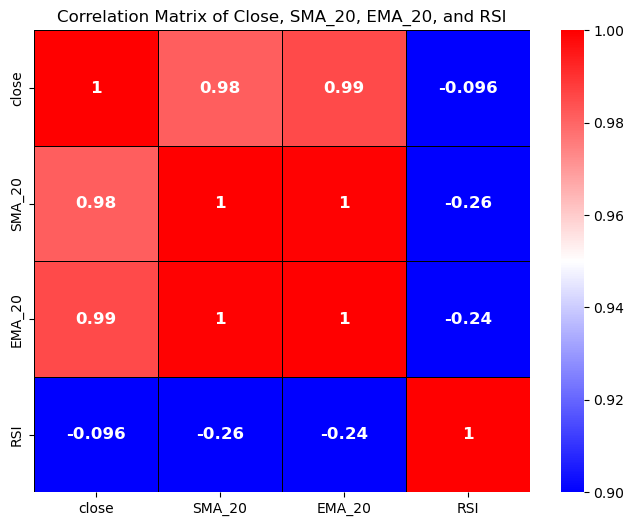

In [229]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='bwr', vmin=0.9, vmax=1, center=0.95, annot_kws={"size": 12, "weight": "bold"}, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Close, SMA_20, EMA_20, and RSI')
plt.show()

* **Price Trend:**
The closing price shows a gradual increase from around 60,000 in June 2023 to over 115,000 in May 2025, with periods of volatility (e.g., strong rise from April 2024 to May 2024).
* **Trade Signals:**
When the closing price exceeds SMA_20 and EMA_20 (e.g., around April 2024), it is a potential buy signal. Conversely, when the closing price drops below (e.g., March 2025), it may signal a sell.
* **Sensitivity:**
EMA_20 (green) responds faster than SMA_20 (orange) to price fluctuations, especially during strong price increases (e.g., April 2024) or decreases (e.g., March 2025), due to its larger weight on recent data.
* **Gap:**
The gap between the closing price, SMA_20, and EMA_20 widens during periods of strong volatility (e.g., April 2024 to May 2024), indicating a clear uptrend; it narrows when prices stabilize (e.g., January 2025).
* **Crossovers:**
Crossovers between the closing price, SMA_20, and EMA_20 (e.g., between March 2025 and April 2025) signal trend changes, which require monitoring to determine buy/sell opportunities.

## Data Visualization

### Closing Price Chart with SMA, EMA and RSI

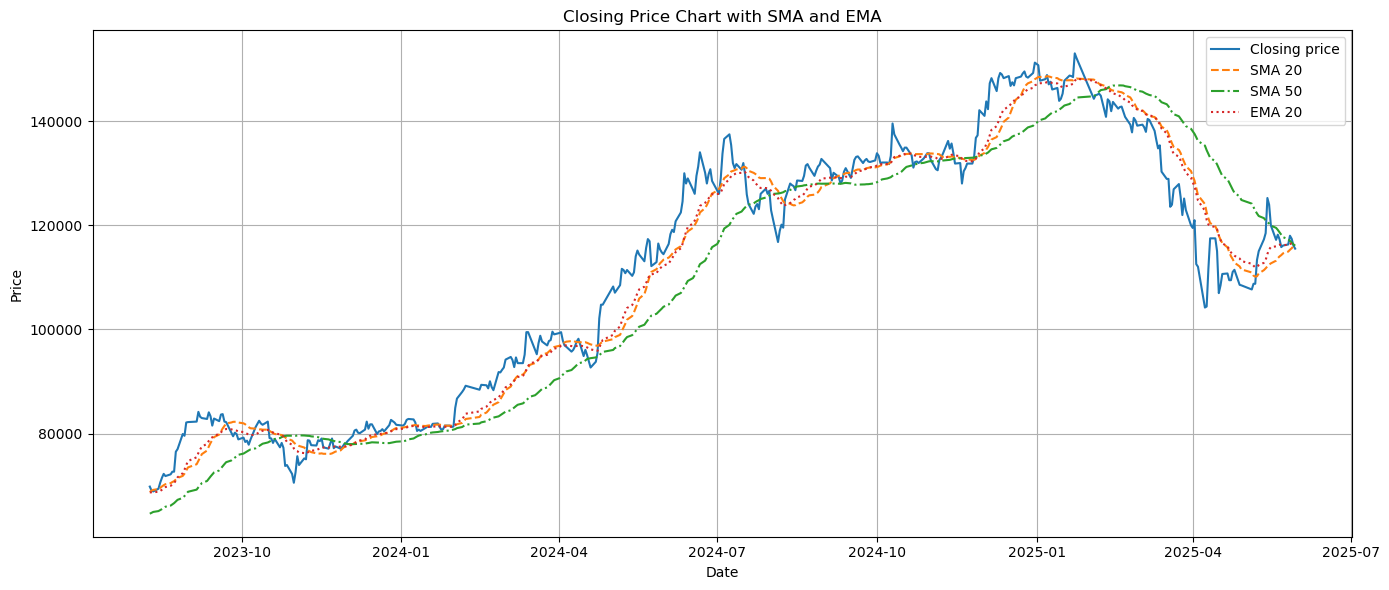

In [234]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close'], label='Closing price', linewidth=1.5)
plt.plot(df['time'], df['SMA_20'], label='SMA 20 ', linestyle='--')
plt.plot(df['time'], df['SMA_50'], label='SMA 50 ', linestyle='-.')
plt.plot(df['time'], df['EMA_20'], label='EMA 20 ', linestyle=':')
plt.title('Closing Price Chart with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

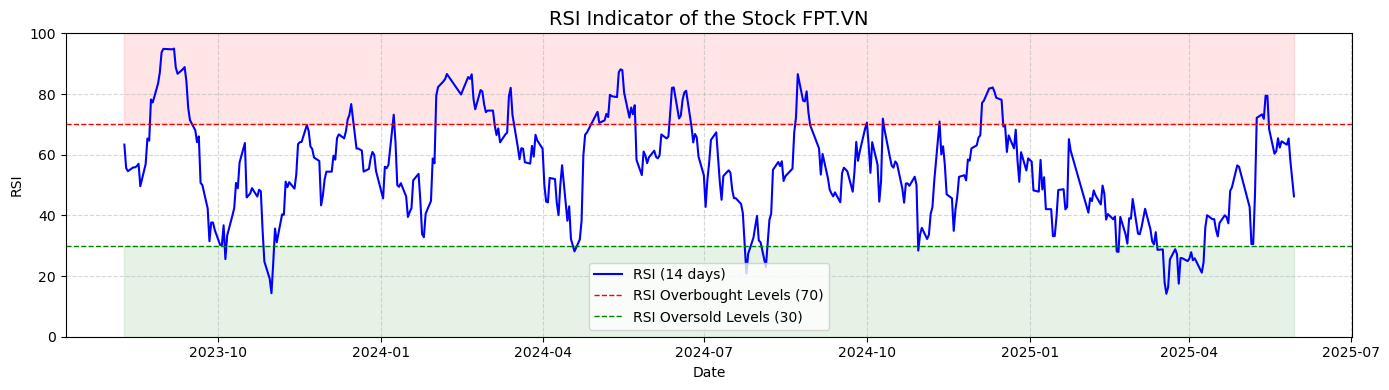

In [235]:
plt.figure(figsize=(14, 4))
plt.plot(df['time'], df['RSI'], label='RSI (14 days)', color='blue', linewidth=1.5)
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='RSI Overbought Levels (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='RSI Oversold Levels (30)')
plt.fill_between(df['time'], 70, 100, color='red', alpha=0.1)
plt.fill_between(df['time'], 0, 30, color='green', alpha=0.1)
plt.title('RSI Indicator of the Stock FPT.VN', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Histogram of Returns

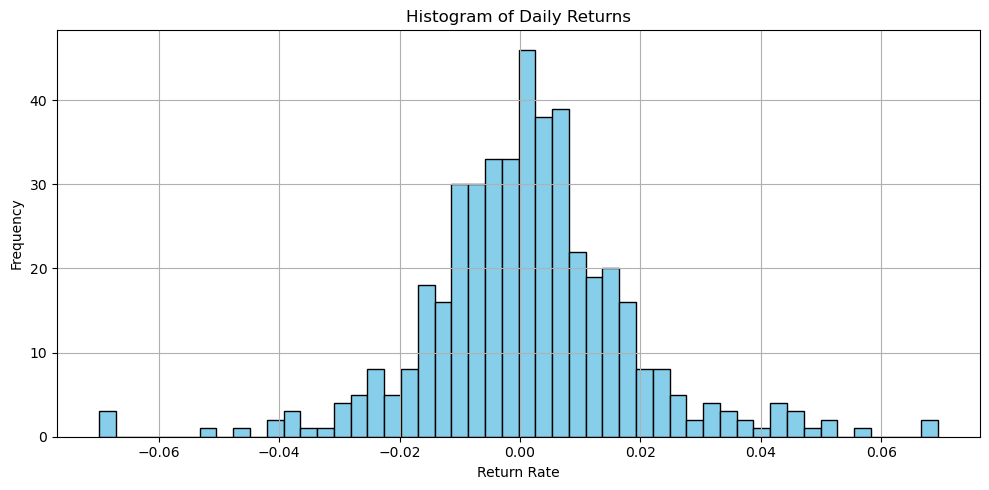

In [239]:
plt.figure(figsize=(10, 5))
plt.hist(df['Return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Heatmap of the Correlation Matrix Between Variables

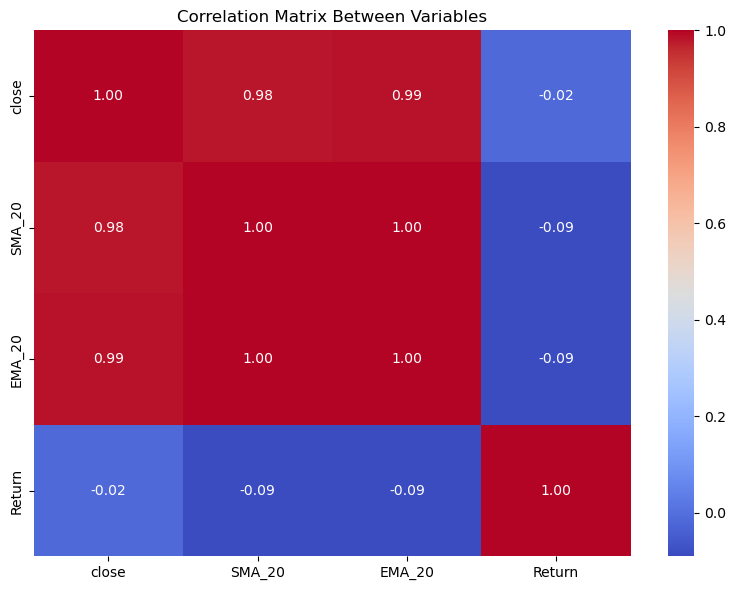

In [242]:
cor_matrix = df[['close', 'SMA_20', 'EMA_20', 'Return']].dropna().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()

## Interpret the Results and Draw Conclusions

### Long-Term Uptrend:
The steady increase in the closing price, particularly from April 2024 to May 2024 (from ~100,000 to 115,510), indicates FPT’s long-term growth potential. This suggests a strong market interest and continued positive performance in the future.

### Adjustment Period:
The notable price drop in March 2025 (from ~130,000 to ~123,000) points to potential selling pressure or negative news affecting the stock. This phase represents a market correction, which is common after periods of significant growth.

### Short-Term Stability:
The price remained relatively stable between January 2025 and March 2025 (around 140,000-150,000), reflecting a sideways trend. This could indicate a phase of consolidation before either a breakout or a decline.

### High Volatility Periods:
- **April 2024 - May 2024:** The sharp increase from 102,130 to 115,510 (a rise of more than 13%) suggests that the price was driven by strong news or business results.
- **March 2025:** The 8% drop from 130,289 to 119,480 signals a correction phase or market risk, highlighting the price's sensitivity to external factors.
- **October 2024:** The 5.7% rise from 131,940 to 139,530 shows strong buying momentum and market optimism at that time.

### Investment Recommendations:

#### Long-Term Strategy:
Considering the long-term upward trend, investors should consider **buying at lower prices** (below SMA_20 or EMA_20, currently around 120,000-130,000) and holding for **6-12 months**, with a target price of **140,000-150,000**, based on historical peaks.

#### Short-Term Strategy:
Investors can **buy** when the closing price surpasses the **EMA_20** and **SMA_20** (as seen in April 2024), and **sell** when the price dips below these levels (as seen in March 2025). It's crucial to monitor prices closely, starting from **June 1, 2025**, to assess the market direction.

#### Risk Management:
To mitigate risk, investors should set a **stop-loss** level of 5-7% below the purchase price to avoid sharp price fluctuations, such as those seen in **March 2025**.

### Additional Analysis:
- Stay updated on FPT’s **news** and **financial reports** to anticipate high-volatility periods (similar to **April 2024**).
- Use the **RSI** indicator (if available) to avoid buying in the overbought region (>70) or selling in the oversold region (<30).

### Data Update:
Since the available data only goes up to May 30, 2025, it is important to **monitor the price closely** from June 20, 2025, onwards. If the price continues to fall below 115,000, it may be wise to delay buying. If the price rises above 120,000, accumulating stocks may be advisable.

### Conclusion:
FPT presents strong **long-term growth potential**, but the stock carries **short-term risks** due to periods of high volatility (as observed in **March 2025** and **April 2024**). Investors should combine **technical analysis** (SMA/EMA) and **news monitoring** to optimize the timing of their trades, while managing risks effectively.
